# Farm size distribution with Lucas-type farm managers

In farm-size distribution models explored in other notebooks we've made the assumption that households have different farming skill $s$ and implicitly that the time required for management is different and non-substitutable with labor used in farm work.  

In those models every farm household produces (unless there are fixed costs to production in which case only the more skilled engage in production. Since every household inelastically supplies labor, total labor supply is always  $\bar L$.  

On the one hand this might be seen as a simplifying assumption but on the other hand it fits the fact that in many/most farming contexts, particularly in developing countries smaller farms often  both operate their own farms and sell labor to other, usually bigger, farms.

Lucas (1978) makes the somewhat different assumption ...

In [1]:
%load_ext watermark
%watermark -u -d -t

last updated: 2017-05-20 22:05:18


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm
plt.rcParams["figure.figsize"] = (10, 8)
np.set_printoptions(precision=4)
%matplotlib inline

In [3]:
from geqfarm import *
%load_ext autoreload
%autoreload 2

In [4]:
N = 10
E = Economy(N)
E.GAMMA = 0.8
Xbar = [E.TBAR, E.LBAR]

By default a flat is set to not run as in Lucas

In [5]:
E.Lucas

False

## Assumed skill distribution

Let's assume the underlying distribution of non-traded farming skill is given by a lognormal

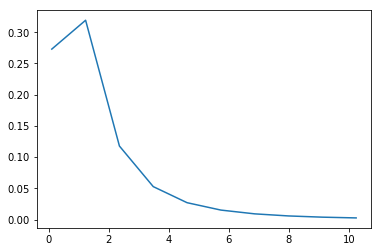

In [6]:
mu = 0
sigma = 1
x = np.linspace(lognorm.ppf(0.01,s=sigma, scale = np.exp(mu)), 
                lognorm.ppf(0.99, s=sigma, scale = np.exp(mu)), N)
rv = lognorm(s=sigma, scale=np.exp(mu))
E.s = rv.pdf(x)
plt.plot(x, E.s);

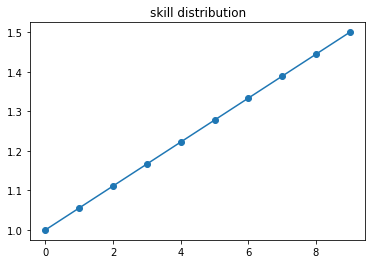

In [7]:
r= lognorm.rvs(s=sigma, scale = np.exp(mu), size=N)
r.sort()
E.s = r
E.s = np.linspace(1,1.5,num=N)
plt.title('skill distribution')
plt.plot(E.s,marker='o');

In [8]:
E.s

array([ 1.    ,  1.0556,  1.1111,  1.1667,  1.2222,  1.2778,  1.3333,
        1.3889,  1.4444,  1.5   ])

In [9]:
E.Lucas = False
rwc, (Tc,Lc) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In [10]:
rwc

array([ 0.3253,  0.3253])

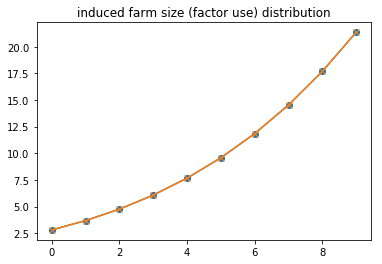

In [11]:
plt.title('induced farm size (factor use) distribution')
plt.plot(Tc,marker='o')
plt.plot(Lc, marker='x');

In [12]:
E.excessD(rwc,Xbar,E.s)

array([ 0.0019,  0.0053])

In [13]:
(Xrc,Xr,wc,wr) = scene_print(E,10, detail=True)


Assumed Parameters
N = 10, GAMMA = 0.8, ALPHA = 0.5, LAMBDA = 0.1, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [ 1.2222  1.2778  1.3333  1.3889  1.4444  1.5   ], 
Lucas = False, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 21.35, 21.35]  [0.33,0.33]   1.00  | 17.36    6.95     6.95 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 18.04, 19.54] [ 0.32, 0.33]  1.02 | 15.67     5.78     0.00     6.37  
 0.10  [ 19.47, 19.49] [ 0.32, 0.32]  1.00 | 16.13     6.30     3.24     6.31  
 0.20  [ 20.94, 19.30] [ 0.33, 0.32]  0.98 | 16.55     6.86     6.55     6.19  
 0.30  [ 23.37, 19.80] [ 0.33, 0.32]  0.96 | 17.47     7.78     9.99     6.30  
 0.40  [ 25.87, 20.30] [ 0.34, 0.32]  0.93 | 18.38     8.77    13.55     6.40  
 0.50  [ 29.38, 20.94] [ 0.35, 0.31]  0.89 | 19.57    10.22    17.39     6.50  
 0.60  [ 33.70, 21.92] [ 0.36, 0.31]  0.85 | 21.06    12.11    21.56     6.69  
 0.70  [ 39.28, 23.

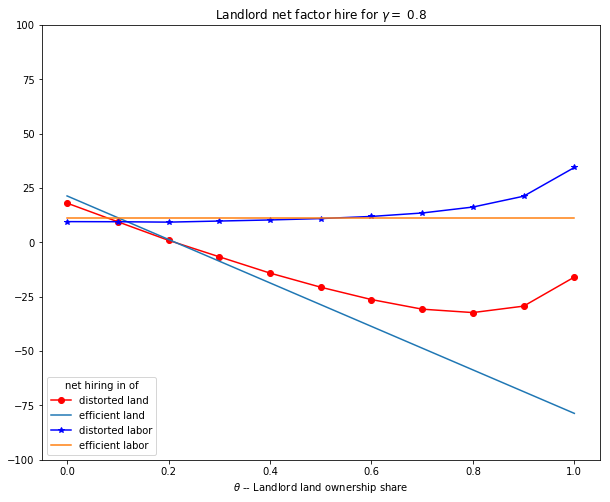

In [14]:
factor_plot(E,Xrc,Xr)

## Lucas = True

In [15]:
E.Lucas = True
rwcl, (Tcl,Lcl) = E.smallhold_eq([E.TBAR,E.LBAR],E.s)

In [16]:
Lcl

array([ 0.    ,  0.    ,  0.    ,  2.0545,  2.5925,  3.2377,  4.0055,
        4.9125,  5.9768,  7.2181])

In [17]:
E.excessD(rwcl,Xbar,E.s)

array([ 0.0018, -0.0024])

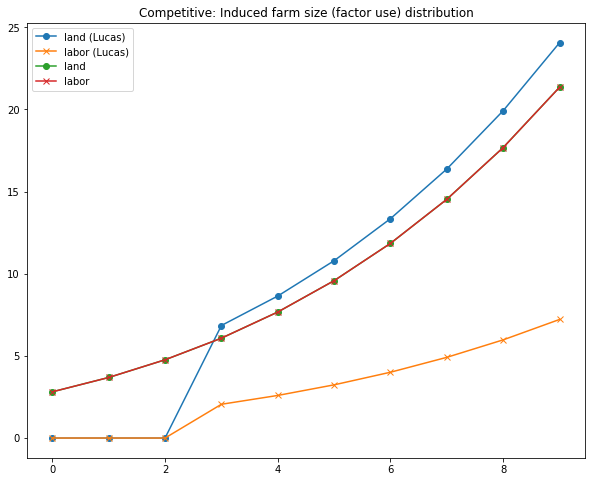

In [18]:
plt.title('Competitive: Induced farm size (factor use) distribution')
plt.plot(Tcl,marker='o',label='land (Lucas)')
plt.plot(Lcl, marker='x',label='labor (Lucas)')
plt.plot(Tc, '-o',label='land ')
plt.plot(Lc, marker='x',label='labor ')
plt.legend();

Not that the two economies are directly comparable (technologies are not the same)... but in the Lucas economy there will be less operating farms and a lower supply of farm labor (since the more skilled become full-time managers).  The farms that do operate will therefore use more land and less labor compared to the non-Lucas economy.

In [19]:
E.Lucas = True
E.smallhold_eq([E.TBAR,E.LBAR/2], E.s)

result(w=array([ 0.1695,  0.7863]), X=array([[  0.    ,   0.    ,   0.    ,   0.    ,   9.278 ,  11.5873,
         14.335 ,  17.5809,  21.3899,  25.8321],
       [  0.    ,   0.    ,   0.    ,   0.    ,   2.    ,   2.4978,
          3.0901,   3.7898,   4.6109,   5.5685]]))

In [20]:
(Xrcl,Xrl,wcl,wrl) = scene_print(E, numS=10, detail=True)


Assumed Parameters
N = 10, GAMMA = 0.8, ALPHA = 0.5, LAMBDA = 0.1, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [ 1.2222  1.2778  1.3333  1.3889  1.4444  1.5   ], 
Lucas = True, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 24.06,  7.22]  [0.20,0.65]   3.33  | 11.80    4.72     4.72 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 15.93,  6.67] [ 0.21, 0.58]  2.78 |  9.69     3.34     0.00     3.88  
 0.10  [ 18.27,  7.42] [ 0.21, 0.58]  2.70 | 10.69     3.90     2.13     4.27  
 0.20  [ 21.56,  8.50] [ 0.22, 0.57]  2.61 | 12.06     4.69     4.35     4.82  
 0.30  [ 24.21,  9.51] [ 0.22, 0.56]  2.48 | 13.21     5.43     6.73     5.29  
 0.40  [ 29.33, 11.16] [ 0.23, 0.54]  2.33 | 15.21     6.83     9.32     6.06  
 0.50  [ 35.01, 13.36] [ 0.24, 0.52]  2.14 | 17.54     8.57    12.24     7.01  
 0.60  [ 42.46, 16.39] [ 0.26, 0.50]  1.90 | 20.56    11.18    15.80     8.20  
 0.70  [ 47.90, 17.2

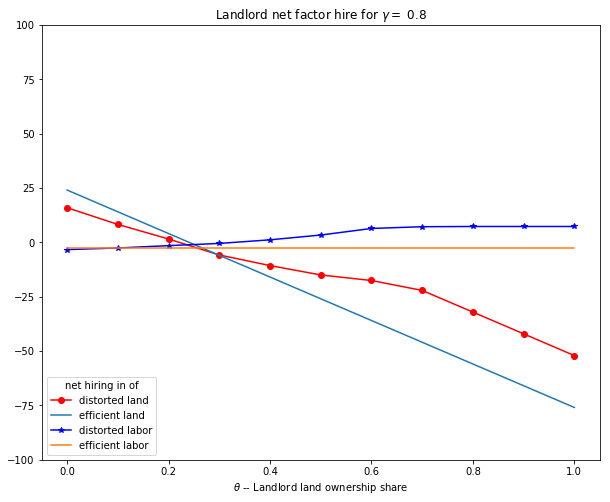

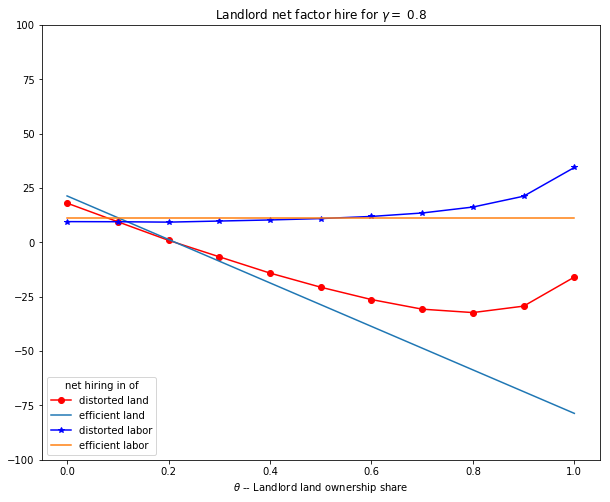

In [21]:
E.Lucas = True
factor_plot(E,Xrcl,Xrl)

E.Lucas = False
factor_plot(E,Xrc,Xr)


In [28]:
E.Lucas = True
E.cartel_eq(0.5)

result(w=array([ 0.2449,  0.5249]), X=array([[  0.    ,   0.    ,   4.2874,   5.4719,   6.9049,   8.6235,
         10.6684,  13.0841,  15.9188,  35.0147],
       [  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
          4.9766,   6.1035,   7.4259,  13.3939]]))

In [31]:
E.cartel_eq(0.6)

result(w=array([ 0.2322,  0.5438]), X=array([[  0.    ,   0.    ,   4.6839,   5.978 ,   7.5435,   9.421 ,
         11.6551,  14.2942,  17.3911,  29.0069],
       [  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
          4.9766,   6.1035,   7.4259,  11.0562]]))

In [32]:
E.cartel_eq(0.8)
Lr

array([  0.    ,   0.    ,   2.    ,   2.5526,   3.221 ,   4.0227,
         4.9766,   6.1035,   7.4259,  16.7246])

Something is still not right... labor used/demanded excees labor supply

In [37]:
(r,w),(Tr,Lr)= E.cartel_eq(0.5)
sum(Lr),np.count_nonzero(Lr)*(E.LBAR)/E.N

(43.696182284960678, 80.0)